# Project Overview:

This notebook contains code for sentiment analysis of reviews of 'British Airways', which has been scrapped from 'Skytrax' website.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# loading dataset

df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Forage\British Airways\Data\BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Another case of reviewing Brit...
1,1,✅ Trip Verified | On the memorable day of Janu...
2,2,Not Verified | I did not actually get to fly w...
3,3,✅ Trip Verified | We had possibly the worse ch...
4,4,✅ Trip Verified | I flew to LHR from ATH in C...


In [3]:
df.shape

(1000, 2)

Our data set contains 1000 reviews.

# Cleaning Data

We begine by cleaning our data.

## Convert to Lowercase

We convert all text to lowercase to ensure consistency and avoid duplication caused by case differences.

In [4]:
df['reviews']=df['reviews'].str.lower()

In [5]:
df['reviews'] = df['reviews'].replace({'trip verified': '', 'not verified': ''}, regex=True)


In [6]:
df.head()

,Unnamed: 0,reviews
0,0,| another case of reviewing british airways ...
1,1,"✅ | on the memorable day of january 9th, my f..."
2,2,| i did not actually get to fly with ba as th...
3,3,✅ | we had possibly the worse check-in experi...
4,4,✅ | i flew to lhr from ath in club europe wi...


## Removing white spaces

We remove trailing and leading white spaces

In [7]:
df['reviews']=df['reviews'].str.strip()

In [8]:
df['reviews'].head()

0    |  another case of reviewing british airways f...
1    ✅  | on the memorable day of january 9th, my f...
2    | i did not actually get to fly with ba as the...
3    ✅  | we had possibly the worse check-in experi...
4    ✅  |  i flew to lhr from ath in club europe wi...
Name: reviews, dtype: object

# Removing Punctuations and Numbers

In [9]:
df['reviews']=df['reviews'].str.replace('[^\w\s]','')
df['reviews']=df['reviews'].str.replace('[|^\d+]','')

C:\Users\HP\AppData\Local\Temp\ipykernel_6752\1716906426.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews']=df['reviews'].str.replace('[^\w\s]','')
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\1716906426.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews']=df['reviews'].str.replace('[|^\d+]','')


In [10]:
df.head()

,Unnamed: 0,reviews
0,0,another case of reviewing british airways fl...
1,1,on the memorable day of january th my famil...
2,2,i did not actually get to fly with ba as they...
3,3,we had possibly the worse checkin experienc...
4,4,i flew to lhr from ath in club europe with...


# Removing stopwords

We will remove stopwords, words that contribute to little value to the overall meaning of the sentence.

In [11]:
# remove stopwords
stop_words=set(stopwords.words('english'))
df['reviews']=df['reviews'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word not in stop_words))

In [12]:
df.head()

,Unnamed: 0,reviews
0,0,another case reviewing british airways flights...
1,1,memorable day january th family embarked journ...
2,2,actually get fly ba cancelled flight days noti...
3,3,possibly worse checkin experience ever ever to...
4,4,flew lhr ath club europe ba dec transfer jal f...


# Lemmatization

We reduce words to their root form.

In [13]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()
df["reviews"] = df["reviews"].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)))

In [14]:
df.head()

,Unnamed: 0,reviews
0,0,another case reviewing british airway flight a...
1,1,memorable day january th family embarked journ...
2,2,actually get fly ba cancelled flight day notic...
3,3,possibly worse checkin experience ever ever to...
4,4,flew lhr ath club europe ba dec transfer jal f...


# Further Cleaning

We remove any remaining special characters and duplicates.

In [15]:
# Remove remaining special characters
df['reviews'] = df['reviews'].str.replace("[^\w\s]", "")

# Remove duplicates
df = df.drop_duplicates(subset=['reviews'])

C:\Users\HP\AppData\Local\Temp\ipykernel_6752\1496694117.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace("[^\w\s]", "")


In [16]:
df['reviews'].head()

0    another case reviewing british airway flight a...
1    memorable day january th family embarked journ...
2    actually get fly ba cancelled flight day notic...
3    possibly worse checkin experience ever ever to...
4    flew lhr ath club europe ba dec transfer jal f...
Name: reviews, dtype: object

In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

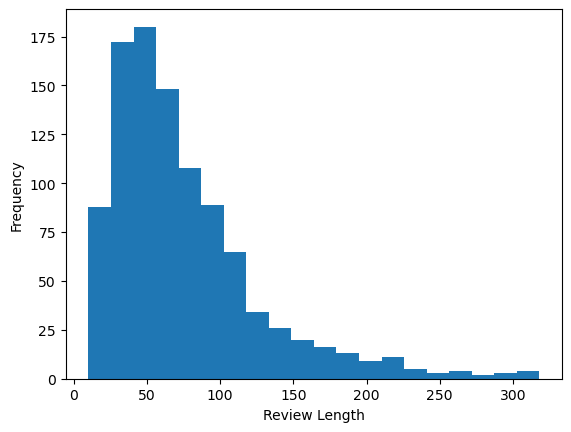

In [19]:
# Carrying out sentiment analysis
sid=SentimentIntensityAnalyzer()
df['sentiment']=df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Descriptive Analysis
review_lengths=df['reviews'].apply(lambda x: len(x.split()))
plt.hist(review_lengths,bins=20)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


## Word Cloud

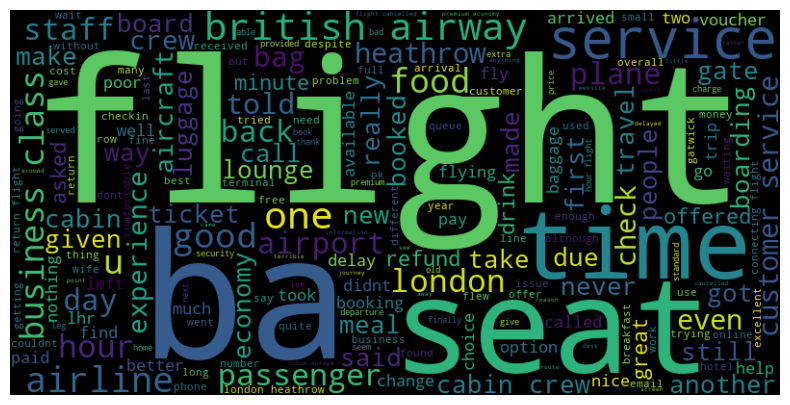

In [20]:
all_reviews=" ".join(df['reviews'])
worldcloud=WordCloud(width=800,height=400).generate(all_reviews)
plt.figure(figsize=(10,5))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Insights and Recommendations

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Topic Modeling using LDA
vectorizer=CountVectorizer(max_features=1000,lowercase=True,stop_words='english')
tf_matrix=vectorizer.fit_transform(df['reviews'])
lda_model=LatentDirichletAllocation(n_components=20,random_state=42)
lda_model.fit(tf_matrix)

# Extracting Topics
topic_keywords=pd.DataFrame(lda_model.components_,columns=vectorizer.get_feature_names())
top_topics=topic_keywords.idxmax(axis=1)
df['topic']=top_topics

# identify common positive and negative words
positive_words = " ".join(df[df['sentiment'] > 0]["reviews"])
negative_words = " ".join(df[df["sentiment"] < 0]["reviews"])

# identify topics and their distributions
topic_distribution=df['topic'].value_counts()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


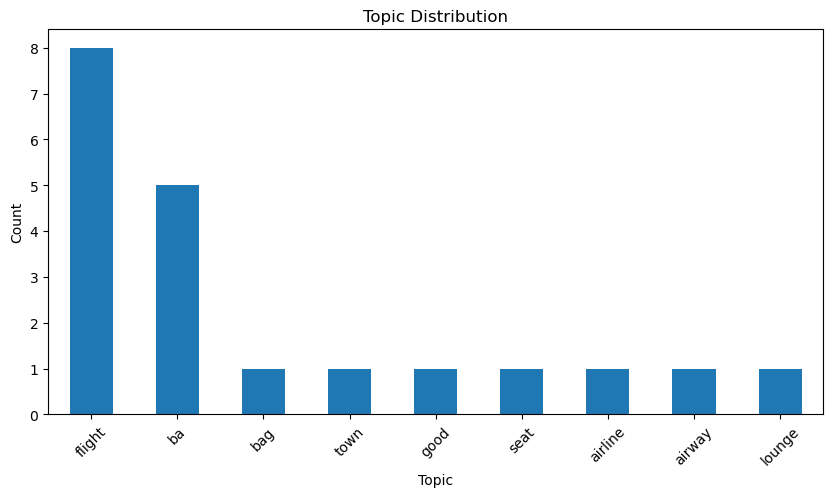

In [23]:
topic_counts = df["topic"].value_counts()

# Plot the topic distribution
plt.figure(figsize=(10, 5))
topic_counts.plot(kind="bar")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Topic Distribution")
plt.xticks(rotation=45)
plt.show()

# Top Positive Words

In [26]:
# Creating a dataframe for positive and negative words
pos_words=pd.DataFrame({'word':positive_words.split()})
neg_words=pd.DataFrame({'word':negative_words.split()})

# counting occurences
pos_wordcounts=pos_words['word'].value_counts()
neg_wordcounts=neg_words['word'].value_counts()

# print the most common positive and neagtive words
print('Common positive words:\n',pos_wordcounts.head(10))
print('Common negative words:\n',neg_wordcounts.head(10))

# Analyzing common sentiments
pos_themes=pos_wordcounts.index.tolist()
neg_themes=neg_wordcounts.index.tolist()

Common positive words:
 flight     1198
ba          712
seat        529
service     456
time        408
good        380
crew        330
food        303
london      292
cabin       276
Name: word, dtype: int64
Common negative words:
 flight     968
ba         553
seat       320
hour       316
service    314
airline    251
london     246
time       220
british    215
airway     213
Name: word, dtype: int64


# Common positive and negative words

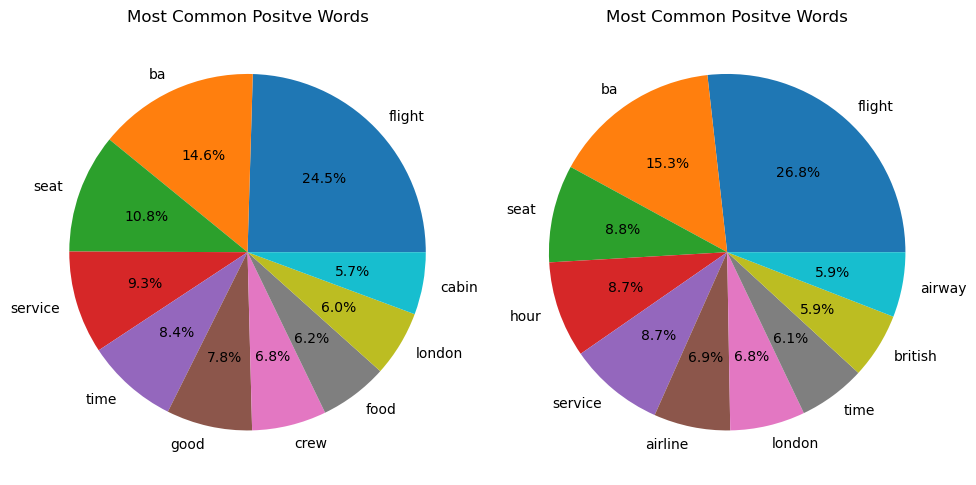

In [27]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

# pie chart for common positive words
axes[0].pie(pos_wordcounts.head(10),labels=pos_wordcounts.head(10).index,
           autopct='%1.1f%%')
axes[0].set_title('Most Common Positve Words')

# pie chart for common negative words
axes[1].pie(neg_wordcounts.head(10),labels=neg_wordcounts.head(10).index,
           autopct='%1.1f%%')
axes[1].set_title('Most Common Positve Words')

# adjusting layout
plt.tight_layout()

plt.show()

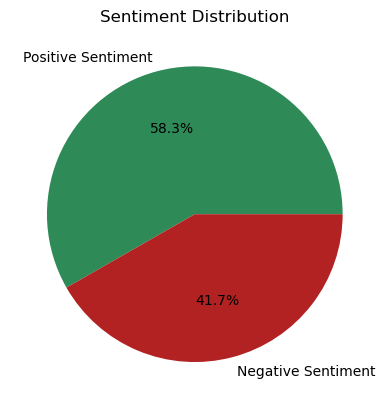

In [31]:
# Word Percentages

poswordperc=sum(pos_wordcounts)/len(df)*100
negwordperc=sum(neg_wordcounts)/len(df)*100

sentiment_labels=['Positive Sentiment','Negative Sentiment']
sent_perc=[poswordperc,negwordperc]
colors=['seagreen','firebrick']

# creating pie chart
plt.pie(sent_perc,labels=sentiment_labels,colors=colors,autopct="%1.1f%%")

# Add a title
plt.title("Sentiment Distribution")

# Display the chart
plt.show()